In [1]:
# saves you having to use print as all exposed variables are printed in the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from ds_discovery import SyntheticBuilder, ModelsBuilder, Commons
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
from scipy import stats
from ds_discovery import SyntheticBuilder

In [5]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [15]:
x = 10 * np.random.random(100)
y = -4 + 2 * x - 3 * x ** 2

model = make_pipeline(PolynomialFeatures(2), Ridge(alpha=1E-8, fit_intercept=False))
model.fit(x[:, None], y)
ridge = model.named_steps['ridge']
print(ridge.coef_)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1e-08, fit_intercept=False))])

[-4.  2. -3.]


In [6]:
N = 300

sb = SyntheticBuilder.from_memory()

In [7]:
df = pd.DataFrame()
df['bias'] = sb.tools.get_ones_zeros(size=N)
df['line'] = sb.tools.get_number(0, 100, size=N)
df['jitter'] = sb.tools.correlate_values(df, header='line', jitter=5)
df['poly'] = sb.tools.correlate_polynomial(df, header='jitter', coefficient=[6, 0, 1])

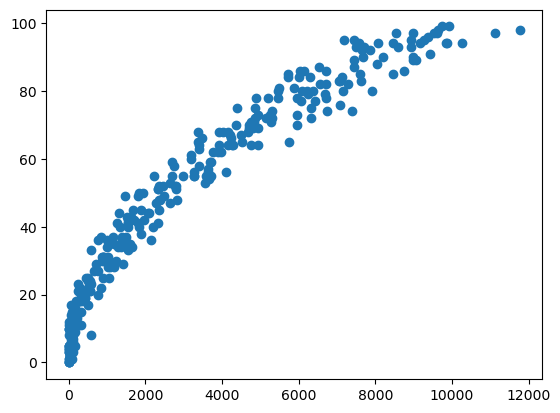

In [8]:
plt.scatter(df['poly'], df['line'])
plt.show()


In [19]:
X = df.drop('line', axis=1).to_numpy().reshape(-1,3)
Y = df['line'].to_numpy().reshape(-1,1)

In [20]:
w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
Yhat = X.dot(w)

Text(0.5, 1.0, 'Our fitted quadratic')

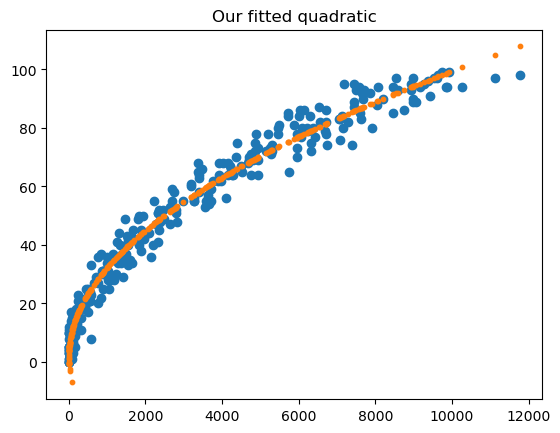

In [21]:
plt.scatter(X[:,2], Y)
plt.scatter(X[:,2], Yhat, s=10)
plt.title("Our fitted quadratic")
plt.show()

In [ ]:
lin_reg.score(X_test, y_test)

In [ ]:
Yhat = lin_reg.predict(X_test)

$$ E = \sum_i \left( y_i - \hat y_i \right)^2 $$

In [ ]:
d1 = y_test - Yhat
ssr = d1.dot(d1)

$$ \text{sum of squared total} = \sum_i \left( y_i - \bar y_i \right)^2 $$

In [ ]:
d2 = y_test - y_test.mean()
sst = d2.dot(d2)

$$ R^2 = 1 - \frac{SSres}{SStot}  $$

In [ ]:
# calculating r-squared
r2 = 1 - ssr/sst
print(f"The r-squared is: {r2}")

In [ ]:
x_axis  = y_test
y_axis = Yhat
plt.scatter(x_axis, y_axis)
plt.show()
